In [223]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [224]:
#import train set
from tensorflow.examples.tutorials.mnist import input_data

In [225]:
# To solve downloading files.
## https://github.com/tensorflow/tensorflow/issues/10779
## run the /Applications/Python 3.6/Install Certificates.command bash script to install newer certs.
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)
print(mnist.train.num_examples)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
55000


In [226]:
# 0 ~ 9까지의 숫자 갯수
nb_classes = 10

In [227]:
# MNIST Data image of shape = 28 * 28 = 784
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes]) # one-hot으로 주어짐.

In [228]:
W = tf.Variable(tf.random_normal([784, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [229]:
# hypothesis
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

In [230]:
# Cost
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

In [231]:
# Minimize Cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.110101)
train = optimizer.minimize(cost)

In [232]:
# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
real = tf.argmax(Y, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, real), dtype=tf.float32))

In [233]:
# Prepare session
session = tf.Session()
session.run(tf.global_variables_initializer())

In [234]:
# Slice the data, epochs, batch_size
training_epochs = 15
batch_size = 100
total_iterator = int(mnist.train.num_examples / batch_size)
print(mnist.train.num_examples)
print(total_iterator)

55000
550


In [235]:
# Fit the train
for epoch in range(training_epochs):
    avg_cost = 0
    total_iterator = int(mnist.train.num_examples / batch_size)
    for i in range(total_iterator):
        batch_x_train, batch_y_train = mnist.train.next_batch(batch_size)
        c_val, _ = session.run([cost, train],
                                   feed_dict={X: batch_x_train, Y: batch_y_train})
        avg_cost += c_val / batch_size
    print("Epoch:", "%04d" % (epoch + 1), ", Cost:", "{:.5f}".format(avg_cost))
    

print("Accuracy:", session.run(accuracy,
                               feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 , Cost: 13.37245
Epoch: 0002 , Cost: 5.89124
Epoch: 0003 , Cost: 4.78319
Epoch: 0004 , Cost: 4.20978
Epoch: 0005 , Cost: 3.83764
Epoch: 0006 , Cost: 3.56810
Epoch: 0007 , Cost: 3.35982
Epoch: 0008 , Cost: 3.19251
Epoch: 0009 , Cost: 3.05565
Epoch: 0010 , Cost: 2.94316
Epoch: 0011 , Cost: 2.83996
Epoch: 0012 , Cost: 2.75725
Epoch: 0013 , Cost: 2.68010
Epoch: 0014 , Cost: 2.61410
Epoch: 0015 , Cost: 2.55696
Accuracy: 0.8899


In [236]:
# learing_rage = 0.01 -> accuracy: 0.7996
# learing_rage = 0.1 -> accuracy: 0.8888
# learing_rage = 0.11 -> accuracy: 0.8938
# learing_rage = 0.111 -> accuracy: nan 0.098
# learing_rage = 0.1101 -> accuracy: 0.8942
# learing_rage = 0.110101 -> accuracy: 0.8976
# learing_rage = 0.11010105 -> accuracy: 0.8888    
# learing_rage = 0.1101011 -> accuracy: nan 0.8903
# learing_rage = 0.110102 -> accuracy: nan 0.889
# learing_rage = 0.1102 -> accuracy: nan 0.8891    
# learing_rage = 0.12 -> accuracy: 0.8929
# learing_rage = 0.2 -> accuracy: nan 0.098
# learing_rage = 1 -> accuracy: nan 0.098

9365
Label:  [3]
Prediction:  [3]


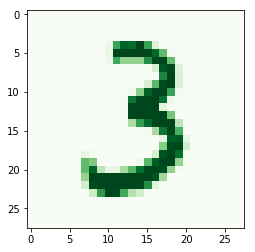

In [259]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print(r)
print("Label: ", session.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))

sample_image = mnist.test.images[r: r+1]
print("Prediction: ", session.run(tf.argmax(hypothesis, 1),
                                  feed_dict={X: sample_image}))

plt.imshow(
    sample_image.reshape(28, 28),
    cmap='Greens',
    interpolation='nearest')
plt.show()